In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, e

### 1-D binary classification by Gaussian distribution
### Maximum likelihood estimation (MLE)

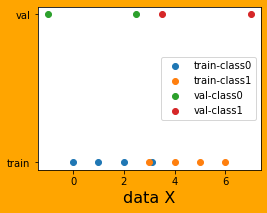

In [2]:
# step 1: get data
X     = np.array([0, 1, 2, 3, 3.1, 4, 5, 6] + [-1, 2.5, 3.5, 7])
yTrue = np.array([0, 0, 0, 1, 0,   1, 1, 1] + [ 0,   0,   1, 1])

# step 2: split to train, val
XTrain     = X[:8]
yTrueTrain = yTrue[:8]
XVal       = X[8:]
yTrueVal   = yTrue[8:]

fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
# yTrueTrain==0 # [True True True False True False False False]
# XTrain[yTrueTrain==0] # [0,1,2,3.1]
# (yTrueTrain==0).sum() # 4
plt.scatter( XTrain[yTrueTrain==0], ["train"]*(yTrueTrain==0).sum() ) # train - class 0 # blue
plt.scatter( XTrain[yTrueTrain==1], ["train"]*(yTrueTrain==1).sum() ) # train - class 1 # orange
plt.scatter( XVal  [yTrueVal  ==0], ["val"  ]*(yTrueVal  ==0).sum() ) # val - class 0 # green
plt.scatter( XVal  [yTrueVal  ==1], ["val"  ]*(yTrueVal  ==1).sum() ) # val - class 1 # red
plt.legend(labels=["train-class0","train-class1","val-class0","val-class1"])
plt.xlabel("data X", fontsize=16)
plt.show()

In [6]:
A = np.array([1,2,3,4,5])
print( A>3 )
print( A[ [False, False, False, True, True] ] )
print( A[ A>3 ] )

[False False False  True  True]
[4 5]
[4 5]


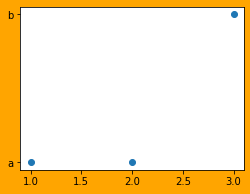

In [12]:
fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
plt.scatter([1,2,3], ["a","a","b"])
plt.show()

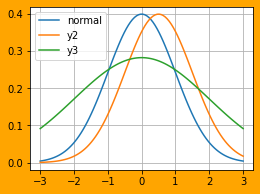

In [13]:
# step 3: create model
# step 4: define loss function L
# step 5: find best mu,si to minimize L

# after some mathematical derivation, the result is equivalent to:
# G0 based on class0 - mu = mean(XTrain where yTrain==0), sig = std(XTrain where yTrain==0)
# G1 based on class1 - mu = mean(XTrain where yTrain==1), sig = std(XTrain where yTrain==1)
# if model0.predict(y) > model1.predict(y): class 0
# else model0.predict(y) < model1.predict(y): class 1

def Gauss(x, mu, si):
    return 1/(2*pi*si)**0.5 * e**(-0.5*(x-mu)**2/si**2)

Xi = np.linspace(-3,3,100)
y1 = Gauss(Xi,   0, 1)
y2 = Gauss(Xi, 0.5, 1)
y3 = Gauss(Xi, 0  , 2)

fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
plt.plot(Xi, y1)
plt.plot(Xi, y2)
plt.plot(Xi, y3)
plt.legend(labels=["normal","y2","y3"])
plt.grid('on')
plt.show()

In [21]:
class Model:
    def __init__(self, mu0, si0, mu1, si1):
        self.mu0, self.si0, self.mu1, self.si1 = mu0, si0, mu1, si1
    def predict(self, x):
        return Gauss(x, self.mu0, self.si0) - Gauss(x, self.mu1, self.si1)

print("XTrain", XTrain)
XTrainC0 = XTrain[yTrueTrain==0]
XTrainC1 = XTrain[yTrueTrain==1]
print("XTrainC0", XTrainC0) # blue dots
print("XTrainC1", XTrainC1) # orange dots

mu0 = XTrainC0.mean() # 1.525
si0 = XTrainC0.std() # 1.15
mu1 = XTrainC1.mean() # 4.5
si1 = XTrainC1.std() # 1.118

model = Model(mu0, si0, mu1, si1) # complete model

XTrain [0.  1.  2.  3.  3.1 4.  5.  6. ]
XTrainC0 [0.  1.  2.  3.1]
XTrainC1 [3. 4. 5. 6.]


In [22]:
print(XVal)
print(yTrueVal)

[-1.   2.5  3.5  7. ]
[0 0 1 1]


In [26]:
# step 6: predict
yPredValScore = model.predict(XVal)
print( "yPredValScore:", yPredValScore )

yPredVal = np.array([ 0 if score>0 else 1 for score in yPredValScore ])
print( "yPredVal:", yPredVal )
print( "yTrueVal:", yTrueVal )

# (yPredVal==yTrueVal)=[True True True True]
accuracy = (yPredVal==yTrueVal).sum() / len(yTrueVal)
print( "accuracy:", accuracy )

yPredValScore: [ 0.03363446  0.1836196  -0.16743153 -0.03096575]
yPredVal: [0 0 1 1]
yTrueVal: [0 0 1 1]
accuracy: 1.0


In [28]:
# binary classification: 4 result
# Pred class 0, GT class 0 -> correct C[0][0]
# Pred class 0; GT class 1 -> error   C[0][1]
# Pred class 1; GT class 0 -> error   C[1][0]
# Pred class 1; GT class 1 -> correct C[1][1]
# confusion matrix

C = np.zeros( (2,2) ) # [[0 0] [0 0]]
for yPred,yTrue in zip(yPredVal, yTrueVal):
    print(yPred, yTrue)
    C[yPred][yTrue]+=1 # [[1 0] [0 0]] # [[2 0] [0 0]] # [[2 0] [0 1]] # [[2 0] [0 2]]
print("Confusion matrix:\n", C)

0 0
0 0
1 1
1 1
Confusion matrix:
 [[2. 0.]
 [0. 2.]]


In [29]:
print(X)

[ 0.   1.   2.   3.   3.1  4.   5.   6.  -1.   2.5  3.5  7. ]


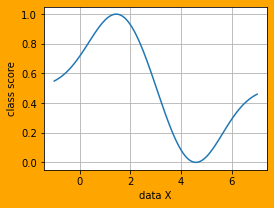

In [34]:
Xi = np.linspace( X.min(), X.max(), 100 ) # 0 ~ 7
yi = model.predict(Xi)

yi = (yi-yi.min())/(yi.max()-yi.min()) # normalize: max=1, min=0

fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
plt.plot(Xi,yi)
plt.grid('on')
plt.xlabel('data X')
plt.ylabel('class score')
plt.show()

In [41]:
A = np.array([10,5,7])
print( A.min() )    # 5
print( A.argmin() ) # 1

print( np.abs(yi-0.5) )
print( np.abs(yi-0.5).argmin() )
print( np.abs(yi-0.5)[50], np.abs(yi-0.5).min() )
Xi[ np.abs(yi-0.5).argmin() ] # border

5
1
[0.04872199 0.05627916 0.06476319 0.07423021 0.08472943 0.09630102
 0.10897394 0.12276371 0.13767028 0.15367597 0.17074355 0.18881471
 0.20780876 0.22762182 0.24812646 0.26917189 0.29058476 0.31217053
 0.33371552 0.35498944 0.37574861 0.3957396  0.41470327 0.4323792
 0.44851022 0.46284704 0.47515285 0.48520768 0.49281238 0.49779224
 0.5        0.49931823 0.49566103 0.48897503 0.47923966 0.46646674
 0.45069944 0.43201074 0.4105014  0.38629763 0.35954855 0.33042352
 0.2991096  0.265809   0.23073684 0.1941191  0.15619088 0.117195
 0.07738077 0.03700306 0.00367849 0.04440028 0.0848955  0.12489505
 0.16412869 0.20232651 0.23922073 0.27454792 0.30805167 0.33948559
 0.36861665 0.39522885 0.4191269  0.44014006 0.45812573 0.47297279
 0.4846045  0.49298087 0.49810021 0.5        0.49875677 0.49448515
 0.48733598 0.4774935  0.46517183 0.45061063 0.43407027 0.41582661
 0.39616539 0.3753767  0.35374946 0.33156612 0.30909783 0.28660012
 0.26430913 0.24243865 0.22117783 0.20068962 0.18111006 0.162

3.0404040404040407

### 2-D ternary classification by Gaussian distribution
### MLE

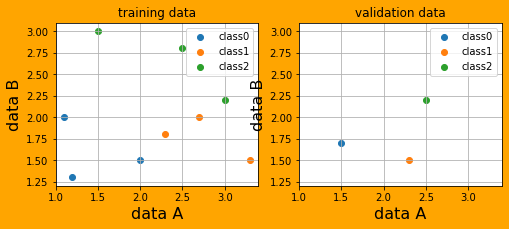

In [45]:
# step 1: get data
X     = np.array([ [1.1,2.0], [2.0,1.5], [1.2,1.3], [1.5,1.7], \
                   [2.3,1.8], [3.3,1.5], [2.7,2.0], [2.3,1.5], \
                   [1.5,3.0], [2.5,2.8], [3.0,2.2], [2.5,2.2], \
                 ])
yTrue = np.array([0,0,0,0, 1,1,1,1, 2,2,2,2])

# step 2: split to train, val
XTrain     = X    [ [0,1,2,4,5,6,8,9,10] ] # X left 9 data
yTrueTrain = yTrue[ [0,1,2,4,5,6,8,9,10] ] # [0 0 0 1 1 1 2 2 2]
XVal       = X    [ [3,7,11] ] # X right 3 data 
yTrueVal   = yTrue[ [3,7,11] ] # [0 1 2]

fig = plt.figure(figsize=(8,3))
fig.set_facecolor("orange")

plt.subplot(1,2,1)
plt.title("training data")
# yTrueTrain==0 # [True True True False False False False False False]
# XTrain[yTrueTrain==0] # [[1.1,2.0], [2.0,1.5], [1.2,1.3]]
# XTrain[yTrueTrain==0][:,0] # [1.1 2.0 1.2] # data A
# XTrain[yTrueTrain==0][:,1] # [2.0 1.5 1.3] # data B
plt.scatter( XTrain[yTrueTrain==0][:,0], XTrain[yTrueTrain==0][:,1] ) # train - class 0 # blue
plt.scatter( XTrain[yTrueTrain==1][:,0], XTrain[yTrueTrain==1][:,1] ) # train - class 1 # orange
plt.scatter( XTrain[yTrueTrain==2][:,0], XTrain[yTrueTrain==2][:,1] ) # train - class 2 # green
plt.legend(labels=["class0","class1","class2"])
plt.xlabel("data A", fontsize=16)
plt.ylabel("data B", fontsize=16)
plt.xlim( X[:,0].min()-0.1, X[:,0].max()+0.1 )
plt.ylim( X[:,1].min()-0.1, X[:,1].max()+0.1 )
plt.grid('on')

plt.subplot(1,2,2)
plt.title("validation data")
plt.scatter( XVal[yTrueVal==0][:,0], XVal[yTrueVal==0][:,1] ) # val - class 0
plt.scatter( XVal[yTrueVal==1][:,0], XVal[yTrueVal==1][:,1] ) # val - class 1
plt.scatter( XVal[yTrueVal==2][:,0], XVal[yTrueVal==2][:,1] ) # val - class 2
plt.legend(labels=["class0","class1","class2"])
plt.xlabel("data A", fontsize=16)
plt.ylabel("data B", fontsize=16)
plt.grid('on')
plt.xlim( X[:,0].min()-0.1, X[:,0].max()+0.1 )
plt.ylim( X[:,1].min()-0.1, X[:,1].max()+0.1 )
plt.show()

In [46]:
# step 3: create model
# step 4: define loss function L
# step 5: find best mu,si to minimize L

# after some mathematical derivation, the result is equivalent to:
# max( G0(a,b,mua0,mub0,sia0,sib0,lo0), G1(a,y,mua1,mub1,sia1,sib1,lo1), G2(a,b,mua2,mub2,sia2,sib2,lo2) )

In [49]:
I = [0, 1, 2]
L = [123, 762, 515]
for idx,ele in zip(I,L):
    print(idx,ele)
    
for idx,ele in enumerate(L):
    print(idx, ele)

0 123
1 762
2 515
0 123
1 762
2 515


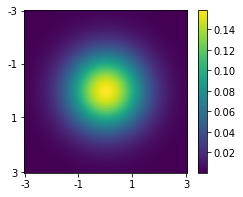

In [56]:
# https://en.wikipedia.org/wiki/Multivariate_normal_distribution
def Gauss(a, b, mua, mub, sia, sib, lo):
    coefficient = 1/(2*pi*sia*sib*(1-lo**2)**0.5)
    exponent    = -0.5/(1-lo**2) * ( ((a-mua)/sia)**2 - 2*lo*(a-mua)/sia*(b-mub)/sib + ((b-mub)/sib)**2 )
    return coefficient * e**exponent

Z = np.zeros( (101,101) )
for i,x in enumerate(np.linspace(-3, 3, 101)): # i = 0,1,2,...,101 # x = -3, -3.00x, ..., 3
    for j,y in enumerate(np.linspace(-3, 3, 101)): # j = 0,1,2,...,101 # y = -3, -3.00x, ..., 3
        Z[i][j] = Gauss(x,y,0,0,1,1,0) # mua=0, mub=0, sia=1, sib=1, lo=0

plt.figure(figsize=(4,3))
plt.xticks([0,33,66,100], [-3,-1,1,3])
plt.yticks([0,33,66,100], [-3,-1,1,3])
plt.imshow(Z)
plt.colorbar()
plt.show()

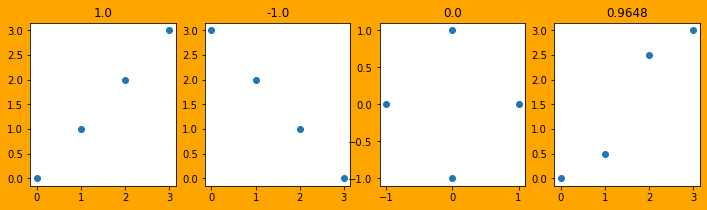

In [58]:
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
def PearsonCorrelation(A, B):
    mua, mub = A.mean(), B.mean()
    cov = sum([ (a-mua)*(b-mub) for a,b in zip(A,B) ]) / len(A)
    return round( cov/(A.std()*B.std()), 4)

test1 = np.array([[0,0], [1,1], [2,2], [3,3]])
test2 = np.array([[0,3], [1,2], [2,1], [3,0]])
test3 = np.array([[0,1], [1,0], [0,-1], [-1,0]])
test4 = np.array([[0,0], [1,0.5], [2,2.5], [3,3]])

lo1 = PearsonCorrelation(test1[:,0], test1[:,1]) # 0,1,2,3 # 0,1,2,3
lo2 = PearsonCorrelation(test2[:,0], test2[:,1]) # 0,1,2,3 # 3,2,1,0
lo3 = PearsonCorrelation(test3[:,0], test3[:,1]) # 0,1,0,-1 # 1,0,-1,0
lo4 = PearsonCorrelation(test4[:,0], test4[:,1])

fig = plt.figure(figsize=(3*4,3))
fig.set_facecolor("orange")
plt.subplot(1,4,1)
plt.title(lo1)
plt.scatter( test1[:,0], test1[:,1] )
plt.subplot(1,4,2)
plt.title(lo2)
plt.scatter( test2[:,0], test2[:,1] )
plt.subplot(1,4,3)
plt.title(lo3)
plt.scatter( test3[:,0], test3[:,1] )
plt.subplot(1,4,4)
plt.title(lo4)
plt.scatter( test4[:,0], test4[:,1] )
plt.show()

In [102]:
class ModelIndependent:
    def __init__(self, mux0, muy0, six0, siy0, lo0, mux1, muy1, six1, siy1, lo1, mux2, muy2, six2, siy2, lo2):
        self.mux0, self.muy0, self.six0, self.siy0, self.lo0 = mux0, muy0, six0, siy0, lo0
        self.mux1, self.muy1, self.six1, self.siy1, self.lo1 = mux1, muy1, six1, siy1, lo1
        self.mux2, self.muy2, self.six2, self.siy2, self.lo2 = mux2, muy2, six2, siy2, lo2
    def predict(self, x, y):
        score0 = Gauss(x, y, self.mux0, self.muy0, self.six0, self.siy0, self.lo0)
        score1 = Gauss(x, y, self.mux1, self.muy1, self.six1, self.siy1, self.lo1)
        score2 = Gauss(x, y, self.mux2, self.muy2, self.six2, self.siy2, self.lo2)
        if type(x)==type(np.array([])):
            # n: number of data # len(x)==len(y)==n
            # score0: shape=(1,n) # j-th col # score0[j]: probability of j-th data belongs to class 0 
            # score1: shape=(1,n)
            # score2: shape=(1,n)
            score  = np.stack([ score0, score1, score2 ]) # shape=(3,n) # score[i][j]: probability of j-th data belongs to class i
            score[:,0] = score[:,0] / score[:,0].sum()
            score[:,1] = score[:,1] / score[:,1].sum()
            score[:,2] = score[:,2] / score[:,2].sum()
            """
            e.g.
            score = [ [0,1,2,3], [4,5,6,7], [8,9,10,11] ] 
            score = [ [0/12, 1/15, 2/18, 3/21], [4/12, 5/15, 6/18, 7/21], [8/12, 9/15, 10/18, 11/21] ]
            """
            return np.round( score, 3 )
        else: # x,y: int
            return score0, score1, score2

print("XTrain", XTrain)
XTrainC0 = XTrain[yTrueTrain==0]
XTrainC1 = XTrain[yTrueTrain==1]
XTrainC2 = XTrain[yTrueTrain==2]
print("XTrainC0", XTrainC0)
print("XTrainC1", XTrainC1)
print("XTrainC2", XTrainC2)

mua0, mub0, sia0, sib0 = XTrainC0[:,0].mean(), XTrainC0[:,1].mean(), XTrainC0[:,0].std(), XTrainC0[:,1].std()
mua1, mub1, sia1, sib1 = XTrainC1[:,0].mean(), XTrainC1[:,1].mean(), XTrainC1[:,0].std(), XTrainC1[:,1].std()
mua2, mub2, sia2, sib2 = XTrainC2[:,0].mean(), XTrainC2[:,1].mean(), XTrainC2[:,0].std(), XTrainC2[:,1].std()
lo0 = PearsonCorrelation(XTrainC0[:,0], XTrainC0[:,1])
lo1 = PearsonCorrelation(XTrainC1[:,0], XTrainC1[:,1])
lo2 = PearsonCorrelation(XTrainC2[:,0], XTrainC2[:,1])

model = ModelIndependent(mua0, mub0, sia0, sib0, lo0, mua1, mub1, sia1, sib1, lo1, mua2, mub2, sia2, sib2, lo2)

XTrain [[1.1 2. ]
 [2.  1.5]
 [1.2 1.3]
 [2.3 1.8]
 [3.3 1.5]
 [2.7 2. ]
 [1.5 3. ]
 [2.5 2.8]
 [3.  2.2]]
XTrainC0 [[1.1 2. ]
 [2.  1.5]
 [1.2 1.3]]
XTrainC1 [[2.3 1.8]
 [3.3 1.5]
 [2.7 2. ]]
XTrainC2 [[1.5 3. ]
 [2.5 2.8]
 [3.  2.2]]


In [103]:
print(XVal)
print(yTrueVal)

[[1.5 1.7]
 [2.3 1.5]
 [2.5 2.2]]
[0 1 2]


In [104]:
# step 6
yPredValScore = model.predict( XVal[:,0], XVal[:,1] )
print( "yPredValScore:\n", yPredValScore )

yPredVal = yPredValScore.argmax(axis=0)
print( "yPredVal:", yPredVal )
print( "yTrueVal:", yTrueVal )

accuracy = (yPredVal==yTrueVal).sum() / len(yTrueVal)
print( "accuracy:", accuracy )

yPredValScore:
 [[1.    0.845 0.001]
 [0.    0.155 0.687]
 [0.    0.    0.312]]
yPredVal: [0 0 1]
yTrueVal: [0 1 2]
accuracy: 0.3333333333333333


In [105]:
C = np.zeros( (3,3) )
for yPred,yTrue in zip(yPredVal, yTrueVal):
    C[yPred][yTrue]+=1
print("Confusion matrix:\n", C)

Confusion matrix:
 [[1. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


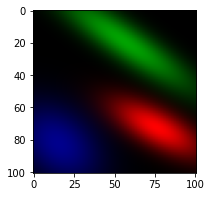

In [107]:
Z = np.zeros( (101,101,3) )
# matrix (i,j) w.r.t. coordinate(x,y): i is -y, j is x
for i,y in enumerate( np.linspace(X[:,1].min(), X[:,1].max(), 101) ):
    for j,x in enumerate( np.linspace(X[:,0].min(), X[:,0].max(), 101) ):
        Z[-1-i][j] = model.predict(x,y)
Z = (Z-Z.min())/(Z.max()-Z.min())
# dot    : class0,class1,class2 = blue,orange,green
# channel: class0,class1,class2 = R,G,B
Z = Z[:,:,[1,2,0]]

plt.figure(figsize=(4,3))
plt.imshow( Z )
plt.show()